# Stock Price Prediction
inspired/base by https://www.youtube.com/watch?v=QIUxPv5PJOY&list=WL&index=7&t=225s <br>
I will call MSFT MS

# Imports

In [37]:
import math
import pandas as pd
import numpy as np

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

#plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

print("Import successful")

#if you dont like the warnings
import warnings
warnings.filterwarnings("ignore")

Import successful


# Processing data
Loading stock data from yahoo.

In [38]:
df=web.DataReader("MSFT", data_source="yahoo", start="2010-01-01", end = "2020-08-01")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.168472
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.176279
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.027906
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.778025
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.942017
...,...,...,...,...,...,...
2020-07-27,203.970001,200.860001,201.470001,203.850006,30160900.0,203.358429
2020-07-28,204.699997,201.740005,203.610001,202.020004,23251400.0,201.532837
2020-07-29,204.649994,202.009995,202.500000,204.059998,19632600.0,203.567917


In [39]:
df = df[["High", "Low", "Close", "Volume", "Adj Close", "Open"]] #reordering to make things easier
df

,High,Low,Close,Volume,Adj Close,Open
Date,,,,,,
2010-01-04,31.100000,30.590000,30.950001,38409100.0,24.168472,30.620001
2010-01-05,31.100000,30.639999,30.959999,49749600.0,24.176279,30.850000
2010-01-06,31.080000,30.520000,30.770000,58182400.0,24.027906,30.879999
2010-01-07,30.700001,30.190001,30.450001,50559700.0,23.778025,30.629999
2010-01-08,30.879999,30.240000,30.660000,51197400.0,23.942017,30.280001
...,...,...,...,...,...,...
2020-07-27,203.970001,200.860001,203.850006,30160900.0,203.358429,201.470001
2020-07-28,204.699997,201.740005,202.020004,23251400.0,201.532837,203.610001
2020-07-29,204.649994,202.009995,204.059998,19632600.0,203.567917,202.500000


In [40]:
dataSet=df.values #creates numpy array
print(type(dataSet))
TrainDataLen=math.ceil(len(dataSet)*.8)

<class 'numpy.ndarray'>


In [41]:
#creating dataframe for plotting(before scaling)
plotdata=df[0:TrainDataLen]  # only plot with train(as it is the data we should know)
plotdata["nextOpen"]=plotdata["Open"]
for i in range(1,TrainDataLen-1):#wrong for 1. and last but thats fine with me
         plotdata["nextOpen"][i]=plotdata["nextOpen"][i+1]

In [42]:
#scaling to (0,1)
scaler=MinMaxScaler(feature_range=(0,1))
scaledData=scaler.fit_transform(dataSet)

In [43]:
#splitting the data in train and test
TrainData=scaledData[0:TrainDataLen]
TestData=scaledData[TrainDataLen -60: ]
TrainData[0]

array([0.04029836, 0.04164459, 0.04150332, 0.09934038, 0.03084165,
       0.03896709])

In [44]:
xTrain=[]#past x days
yTrain=[]#prediction target

for i in range(60, len(TrainData)): #give 60 days of data=> predict 61th day
    xTrain.append(TrainData[i-60:i])
    yTrain.append(TrainData[i, 5])
    
xTest=[]
yTest=[]
for i in range(60, len(TestData)): #give 60 days of data=> predict 61th day
    xTest.append(TestData[i-60:i])
    yTest.append(TrainData[i, 5])
    
xTrain, yTrain=np.array(xTrain), np.array(yTrain)    
xTest, yTest=np.array(xTest), np.array(yTest)

print("xTrain Type:",type(xTrain), "\t xTest Type:",type(xTest),
      "\tyTrain Type:",type(yTrain[0]),"\tyTest Type:",type(yTest[0]),)
print("xTrain Len:",len(xTrain[0]), "\t xTest Len:",len(xTest[0])) #=60* 6 attr

xTrain Type: <class 'numpy.ndarray'> 	 xTest Type: <class 'numpy.ndarray'> 	yTrain Type: <class 'numpy.float64'> 	yTest Type: <class 'numpy.float64'>
xTrain Len: 60 	 xTest Len: 60


In [45]:
xTrain.shape

(2071, 60, 6)

In [46]:
xTest.shape

(532, 60, 6)

In [47]:
# #the lstm model expects 3 dim  but xtrain has only 2
# xTrain=np.reshape(xTrain,(xTrain.shape[0], xTrain.shape[1], 1))

# Plot

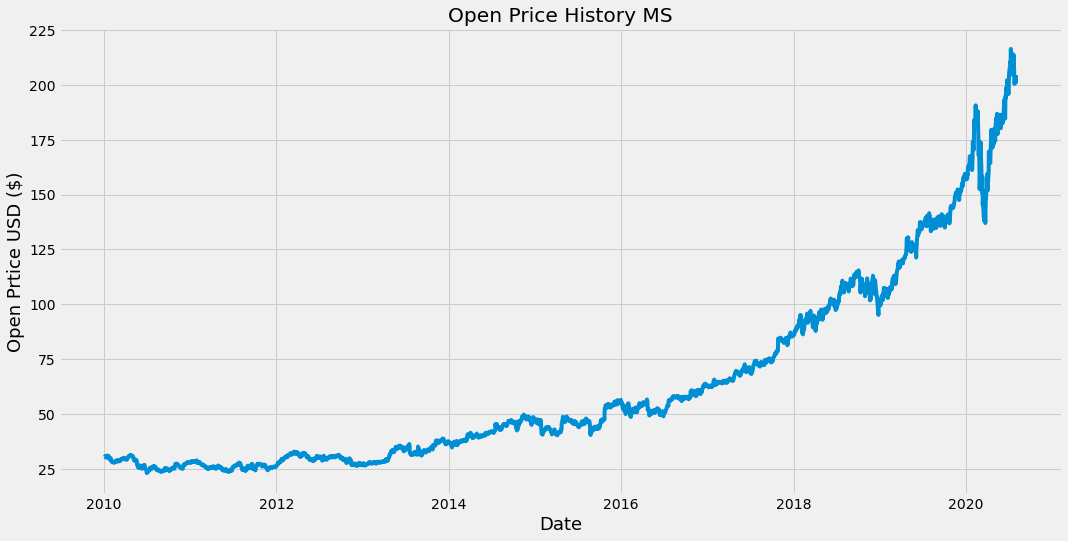

In [48]:
plt.figure(figsize=(16,8))
plt.title("Open Price History MS")
plt.plot(df["Open"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Open Prtice USD ($)", fontsize=18)
plt.show()  #useless

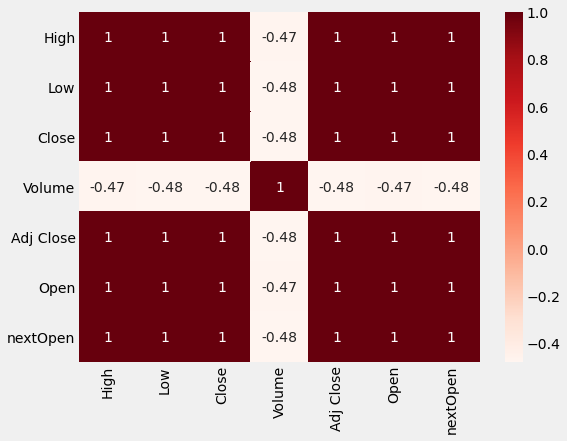

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')
 #obviously the values correlate (but to confirm)

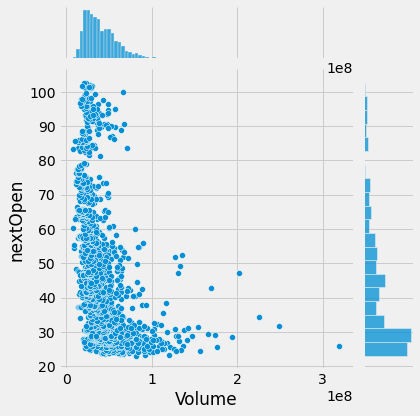

In [50]:
sns.jointplot(x="Volume", y="nextOpen", data=plotdata)

# Model

In [51]:
model=Sequential()
Neurons1=128
Neurons2=50 #more did not rly improve the results
model.add(LSTM(Neurons1,return_sequences=True, input_shape=xTrain[0].shape))# , input_shape=(xTrain.shape[1],1)
model.add(LSTM(Neurons2,return_sequences=False))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="MSE", metrics=["MSE"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 128)           69120     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                35800     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 106,221
Trainable params: 106,221
Non-trainable params: 0
_________________________________________________________________


# Training

In [52]:
try:
    model=keras.models.load_model("MS1.h5")
    print("Trainings data found")
except:
   
    print("training")
    model.fit(xTrain, yTrain, batch_size=4, epochs=10)
    model.save("MS1.h5")

training
Epoch 1/10
2071/2071 [==============================] - 19s 9ms/step - loss: 1.5489e-04 - MSE: 1.5489e-04
Epoch 2/10
2071/2071 [==============================] - 18s 9ms/step - loss: 6.2337e-05 - MSE: 6.2337e-05
Epoch 3/10
2071/2071 [==============================] - 18s 9ms/step - loss: 5.4659e-05 - MSE: 5.4659e-05
Epoch 4/10
2071/2071 [==============================] - 18s 9ms/step - loss: 4.7369e-05 - MSE: 4.7369e-05
Epoch 5/10
2071/2071 [==============================] - 18s 9ms/step - loss: 4.4428e-05 - MSE: 4.4428e-05
Epoch 6/10
2071/2071 [==============================] - 18s 9ms/step - loss: 3.0255e-05 - MSE: 3.0255e-05
Epoch 7/10
2071/2071 [==============================] - 19s 9ms/step - loss: 3.7902e-05 - MSE: 3.7902e-05
Epoch 8/10
2071/2071 [==============================] - 18s 9ms/step - loss: 2.9805e-05 - MSE: 2.9805e-05
Epoch 9/10
2071/2071 [==============================] - 18s 9ms/step - loss: 2.9431e-05 - MSE: 2.9431e-05
Epoch 10/10
2071/2071 [==============

# Predicitions

In [55]:
#get the real values
predictions = model.predict(xTest)
#scaler=MinMaxScaler(feature_range=(0,1)) #already defined above
#scaled = scaler.fit(predictions)
#predictions = scaler.inverse_transform(predictions) # does not work because input != input we scaled (scaled 6 cols)
#predictions


#inserting new vals in xtest just to inversscale with the right vals to extract them
# this seems to be a very bad execution but a better one does not come to mind right now
clone=dataSet[TrainDataLen:].copy()
for i in range(len(predictions)):
    clone[i][5]=predictions[i]
Pred = scaler.inverse_transform(list(clone))
pred=[]
for i in range(len(predictions)):
    pred.append([Pred[i][5]])
pred=np.array(pred)

In [56]:
model.evaluate(xTest, yTest)

532/532 [==============================] - 0s 581us/step


[0.34391470959312037, 0.343914657831192]

In [57]:
rsme= np.sqrt(np.mean(predictions-yTest)**2)#root mean squared error
rsme

0.5694581676518735

# Plot the data post Prediction

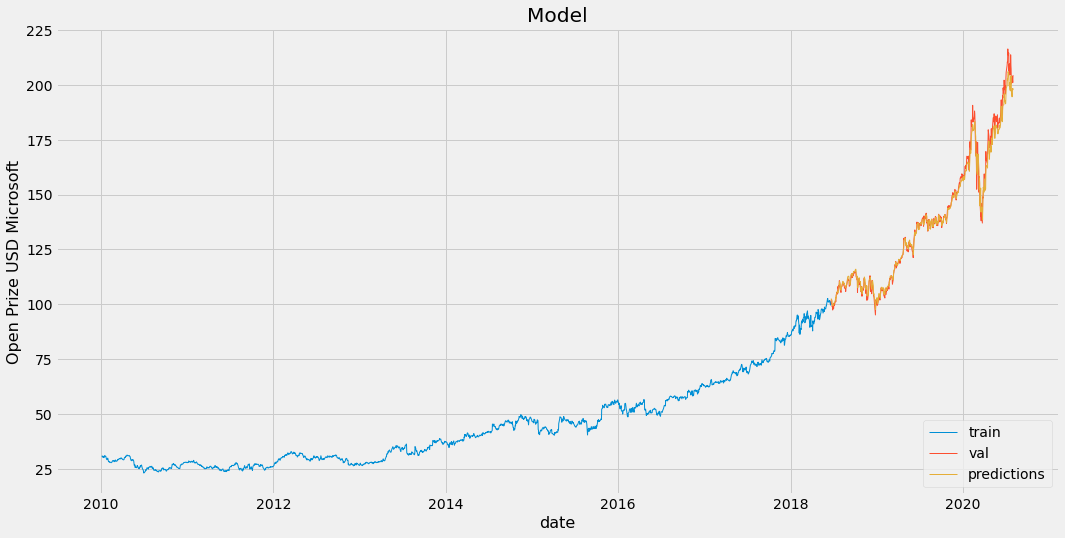

In [58]:
data=df.filter(["Open"])
train=data[:TrainDataLen]
valid=data[TrainDataLen:]
valid["predictions"]=pred
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("date", fontsize=16)
plt.ylabel("Open Prize USD Microsoft", fontsize=16)
plt.plot(train["Open"],linewidth=1)
plt.plot(valid[["Open", "predictions"]],linewidth=1)
plt.legend(["train", "val", "predictions"], loc="lower right")
plt.show()

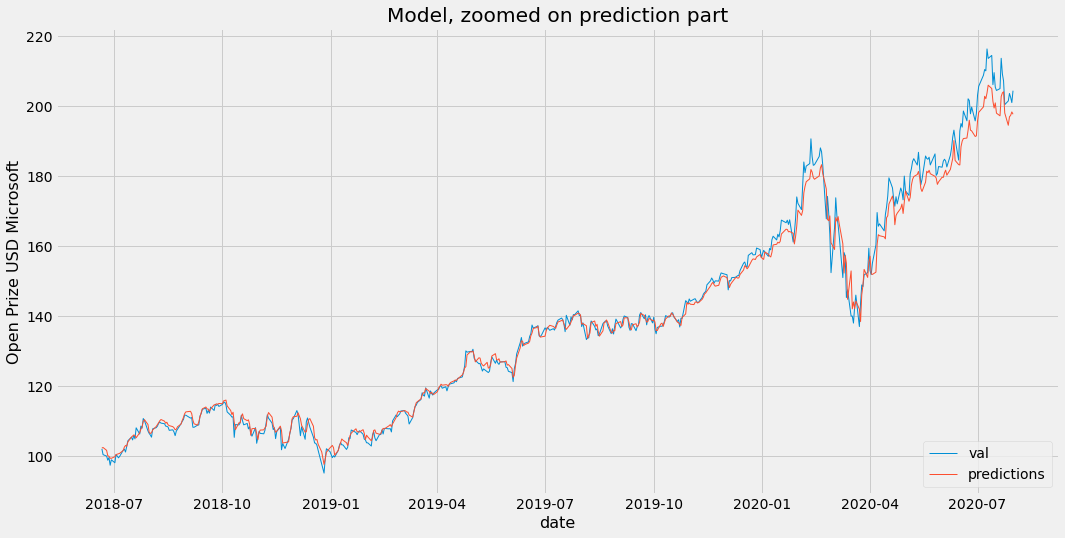

In [59]:
#zoomed in on new data
plt.figure(figsize=(16,8))
plt.ylabel("Open Prize USD Microsoft", fontsize=16)
plt.xlabel("date", fontsize=16)
plt.title("Model, zoomed on prediction part")
plt.plot(valid[["Open", "predictions"]],linewidth=1)
plt.legend([ "val", "predictions"], loc="lower right")
plt.show()

In [62]:
valid["dif(%)"]=((valid["Open"]-valid["predictions"])/valid["Open"])*100
valid["difABS(%)"]=abs(valid["dif(%)"])
valid

,Open,predictions,dif(%),difABS(%)
Date,,,,
2018-06-21,102.080002,102.308316,-0.223662,0.223662
2018-06-22,100.410004,102.452009,-2.033667,2.033667
2018-06-25,100.000000,101.641372,-1.641372,1.641372
2018-06-26,98.820000,100.081270,-1.276331,1.276331
2018-06-27,99.580002,99.942386,-0.363913,0.363913
...,...,...,...,...
2020-07-27,201.470001,194.524305,3.447509,3.447509
2020-07-28,203.610001,196.942291,3.274746,3.274746
2020-07-29,202.500000,197.345145,2.545608,2.545608


In [63]:
valid.describe()

,Open,predictions,dif(%),difABS(%)
count,532.000000,532.000000,532.000000,532.000000
mean,137.771128,136.993319,0.297884,1.290375
std,30.185347,28.163604,1.794809,1.281420
min,95.139999,97.623565,-9.218579,0.000091
25%,110.087500,110.693856,-0.661834,0.361993
50%,136.025002,135.881206,0.124141,0.896934
75%,157.185005,156.185099,1.189432,1.746084
max,216.330002,205.974144,5.812084,9.218579


filtering pre Covid-19 lockdown data

In [64]:
preCovid=valid["2018-06-21":"2020-02-1"] #the date is a point before the big decline
preCovid

,Open,predictions,dif(%),difABS(%)
Date,,,,
2018-06-21,102.080002,102.308316,-0.223662,0.223662
2018-06-22,100.410004,102.452009,-2.033667,2.033667
2018-06-25,100.000000,101.641372,-1.641372,1.641372
2018-06-26,98.820000,100.081270,-1.276331,1.276331
2018-06-27,99.580002,99.942386,-0.363913,0.363913
...,...,...,...,...
2020-01-27,161.149994,163.657098,-1.555758,1.555758
2020-01-28,163.779999,160.614779,1.932605,1.932605
2020-01-29,167.839996,162.688629,3.069213,3.069213


In [65]:
preCovid.describe()

,Open,predictions,dif(%),difABS(%)
count,406.000000,406.000000,406.000000,406.000000
mean,124.579532,124.698645,-0.190956,0.844661
std,18.550085,17.752627,1.140006,0.788007
min,95.139999,97.623565,-5.363921,0.000091
25%,108.112501,108.712289,-0.829414,0.274974
50%,120.590000,120.784297,-0.101007,0.641840
75%,138.389999,138.208015,0.447181,1.190943
max,174.050003,170.282275,4.800392,5.363921


# Feedback/Notes version 2
I wanted to predict the open column and used all data for the input, not just the same column. <br>
The predictive qualities of the model seem to have worsened with the new data. <br>
- with 128 and 50 neurons 10epoches: max error < 21%
- with 128\*2 and 50\*2 neurons 10epoches: max error  <22

Obviously it is especially hard to predict stock pirces when something very unlikely/something noone expected happenes, like a global pandemic.

# Feedback/Notes version 1 (see Github vers)
Apple:
being 3.3%of on average is way to high for a stock environment. (apple   code = AAPL, Apple1.h5)

Microsoft: mean dif is better with MS, but a max dif of over 15% is way to huge. (Microsoft code=MS, MS1.h5)